<a href="https://colab.research.google.com/github/Ajay-Sai-Kiran/PyTorch/blob/main/Day_2_Key_Elements_of_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Key Elements of PyTorch

#The PyTorch autograd Library

The **autograd library** consists of a technique called **automatic differentiation**. 

Its purpose is to **numerically calculate the derivative of a function**.

This is crucial **for backward propagation**, which is carried out **while training a neural network.**

**The derivative (also known as the gradient) of an element refers to the rate of change of that element in a given time step.**



**In deep learning, gradients refer to the dimension and magnitude in which the parameters of the neural network must be updated in a training step in order to minimize the loss function.**

To **compute the gradients**, simply call the **backward() function**

In [2]:
import torch

In [3]:
a = torch.tensor([5.0, 3.0], requires_grad=True)
b = torch.tensor([1.0, 4.0])
ab = ((a + b) ** 2).sum()
ab.backward()

Two tensors were created. We use the **requires_grad**
argument here to tell PyTorch to calculate the gradients of that tensor.

A function was defined using the values of both tensors. Finally, the **backward() function** was used to calculate the gradients.

#The PyTorch nn Module

The **nn module is a complete PyTorch module used to create and train neural**
**networks  which, through the use of different elements, allows for simple and** **complex developments.**

#Building a neural network architecture

#Defining a Single-Layer Architecture

In [2]:
import torch
import torch.nn as nn

In [6]:
input_units = 10
output_units = 1

In [7]:
model = nn.Sequential(nn.Linear(input_units, output_units), \
nn.Sigmoid())

In [8]:
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=1, bias=True)
  (1): Sigmoid()
)


In [13]:
loss_funct = nn.MSELoss()

In [14]:
print(loss_funct)

MSELoss()


#The PyTorch optim Package

The optim package is used to define the optimizer that will be used to update
the parameters in each iteration using the gradients calculated by the autograd module.

To set the optimizer to be used

In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Weights are the values that are used to determine the level of importance of a bit
of information in a general context. This means that every bit of information has
an accompanying weight for every neuron in the network. Moreover, bias is similar
to the intercept element that's added to a linear function and is used to adjust the
output from the computation of relevance in a given neuron.

#Training a Neural Network

In [17]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [18]:
x = torch.randn(20,10)
y = torch.randint(0,2, (20,1)).type(torch.FloatTensor)

In [19]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [23]:
losses = []
for i in range(20):
  y_pred = model(x)
  loss = loss_funct(y_pred, y)
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
if i%5 == 0:
  print(i, loss.item())

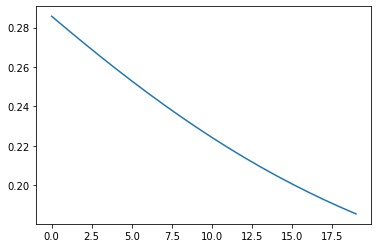

In [24]:
plt.plot(range(0,20), losses)
plt.show()